In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_attack_prediction_indonesia.csv')

In [3]:
df.head()

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1


In [4]:
df.shape

(158355, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             158355 non-null  object 
 12  physical_activit

In [6]:
df.columns

Index(['age', 'gender', 'region', 'income_level', 'hypertension', 'diabetes',
       'cholesterol_level', 'obesity', 'waist_circumference', 'family_history',
       'smoking_status', 'alcohol_consumption', 'physical_activity',
       'dietary_habits', 'air_pollution_exposure', 'stress_level',
       'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'participated_in_free_screening', 'heart_attack'],
      dtype='object')

# EDA

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isnull().sum()

age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     0
EKG_results                       0
previous_heart_disease            0
medication_usage                  0
participated_in_free_screening    0
heart_attack                

In [9]:
df.describe()

,age,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
count,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000,158355.000000
mean,54.543778,0.299069,0.199804,199.533264,0.249901,93.268504,0.300218,6.480064,129.515772,79.490809,110.736762,49.491478,129.569916,149.715885,0.200575,0.499770,0.601029,0.401004
std,11.910897,0.457851,0.399854,39.737565,0.432957,16.382205,0.458354,1.425398,15.005641,10.002964,27.673445,9.982634,34.913318,49.023473,0.400432,0.500002,0.489688,0.490103
min,25.000000,0.000000,0.000000,100.000000,0.000000,20.000000,0.000000,3.000000,61.000000,37.000000,70.000000,8.000000,-19.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,172.000000,0.000000,82.000000,0.000000,5.492985,119.000000,73.000000,89.000000,43.000000,106.000000,116.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,199.000000,0.000000,93.000000,0.000000,6.507461,130.000000,80.000000,109.000000,49.000000,130.000000,149.000000,0.000000,0.000000,1.000000,0.000000
75%,63.000000,1.000000,0.000000,226.000000,0.000000,104.000000,1.000000,7.520640,140.000000,86.000000,130.000000,56.000000,153.000000,183.000000,0.000000,1.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,350.000000,1.000000,173.000000,1.000000,9.000000,199.000000,127.000000,230.000000,93.000000,282.000000,380.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='heart_attack'>

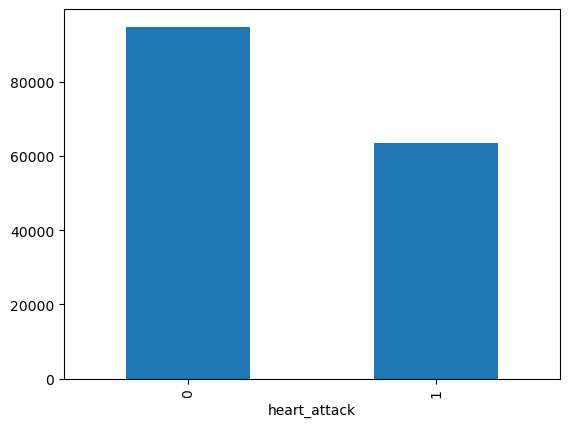

In [10]:
df['heart_attack'].value_counts().plot(kind= 'bar')

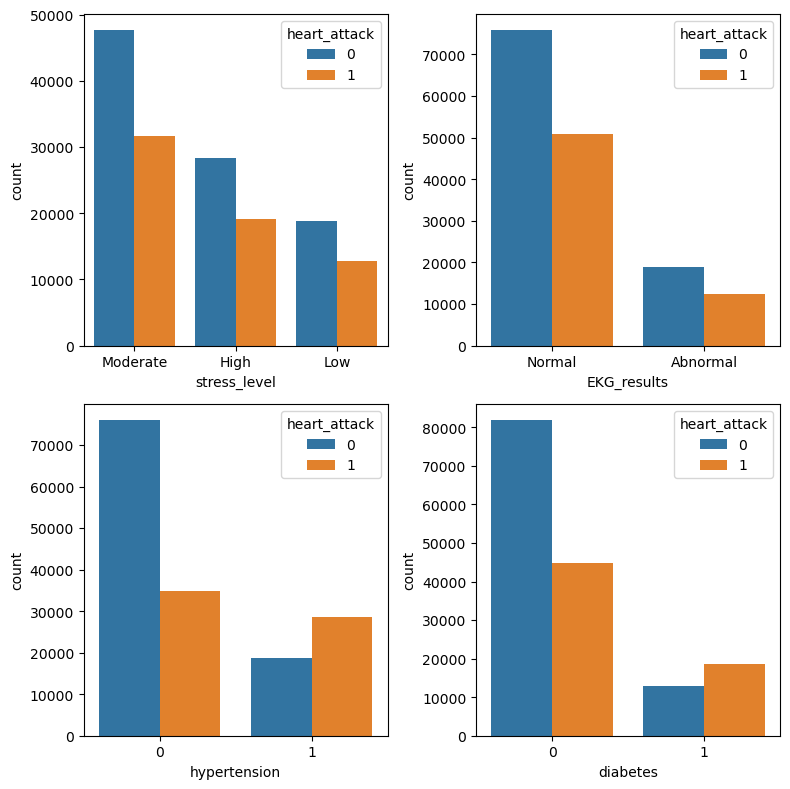

In [11]:
plt.figure(figsize=(8,8))
def plotting_6(var, num):
    plt.subplot(2,2,num)
    sns.countplot( x = df[var], hue=df['heart_attack'])

plotting_6('stress_level',1)
plotting_6('EKG_results',2)
plotting_6('hypertension',3)
plotting_6('diabetes',4)

plt.tight_layout()

<Axes: xlabel='smoking_status', ylabel='count'>

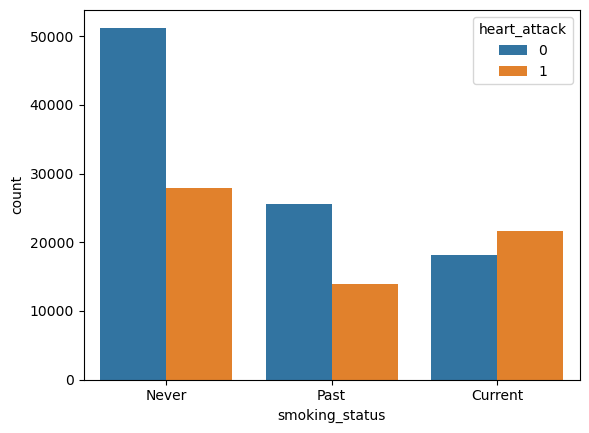

In [12]:
sns.countplot( x = df['smoking_status'], hue=df['heart_attack'])

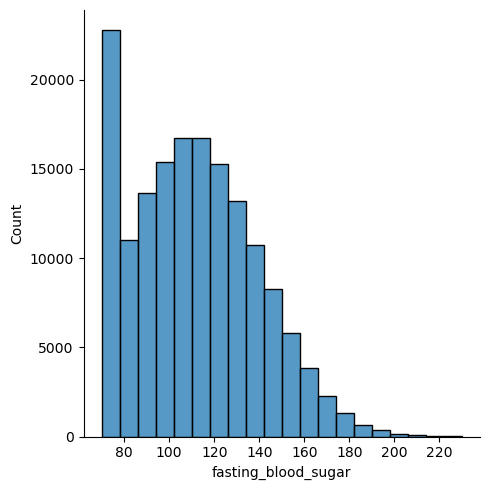

In [13]:
sns.displot(df['fasting_blood_sugar'], bins= 20)

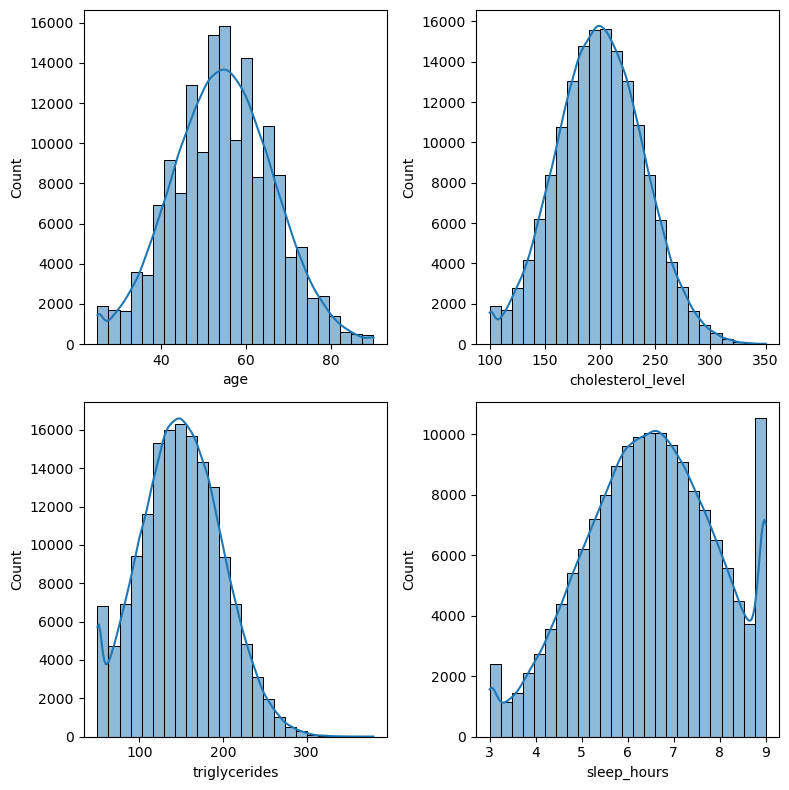

In [14]:

plt.figure(figsize=(8,8))
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde= True, bins= 25)

plotting('age', 1)
plotting("cholesterol_level", 2)
plotting("triglycerides", 3)
plotting("sleep_hours",4)
plt.tight_layout()

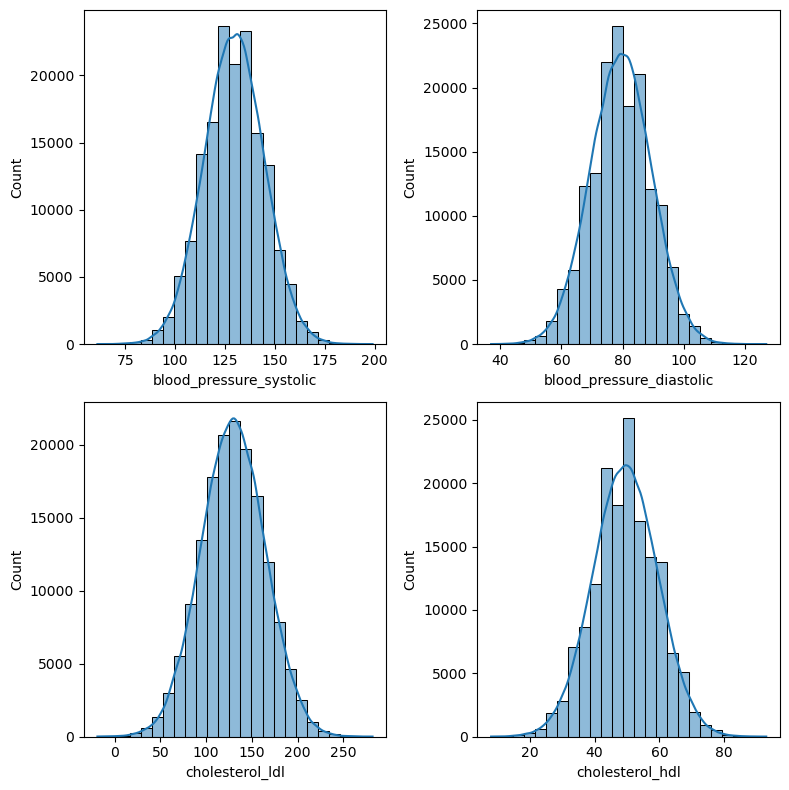

In [15]:
plt.figure(figsize=(8,8))
def plotting_2(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde= True, bins=25)

plotting_2('blood_pressure_systolic',1)
plotting_2('blood_pressure_diastolic',2)
plotting_2('cholesterol_ldl',3)
plotting_2('cholesterol_hdl',4)

plt.tight_layout()

In [16]:
hdl_mean = df['cholesterol_hdl'].mean()
df.loc[df['cholesterol_hdl'] < 20, 'cholesterol_hdl'] = hdl_mean

C:\Users\sapna\AppData\Local\Temp\ipykernel_15112\3674265259.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.49147800827255' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['cholesterol_hdl'] < 20, 'cholesterol_hdl'] = hdl_mean


In [17]:
ldl_mean = df['cholesterol_ldl'].mean()
df.loc[df['cholesterol_ldl'] < 20, 'cholesterol_ldl'] = ldl_mean

C:\Users\sapna\AppData\Local\Temp\ipykernel_15112\594254829.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '129.5699156957469' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['cholesterol_ldl'] < 20, 'cholesterol_ldl'] = ldl_mean


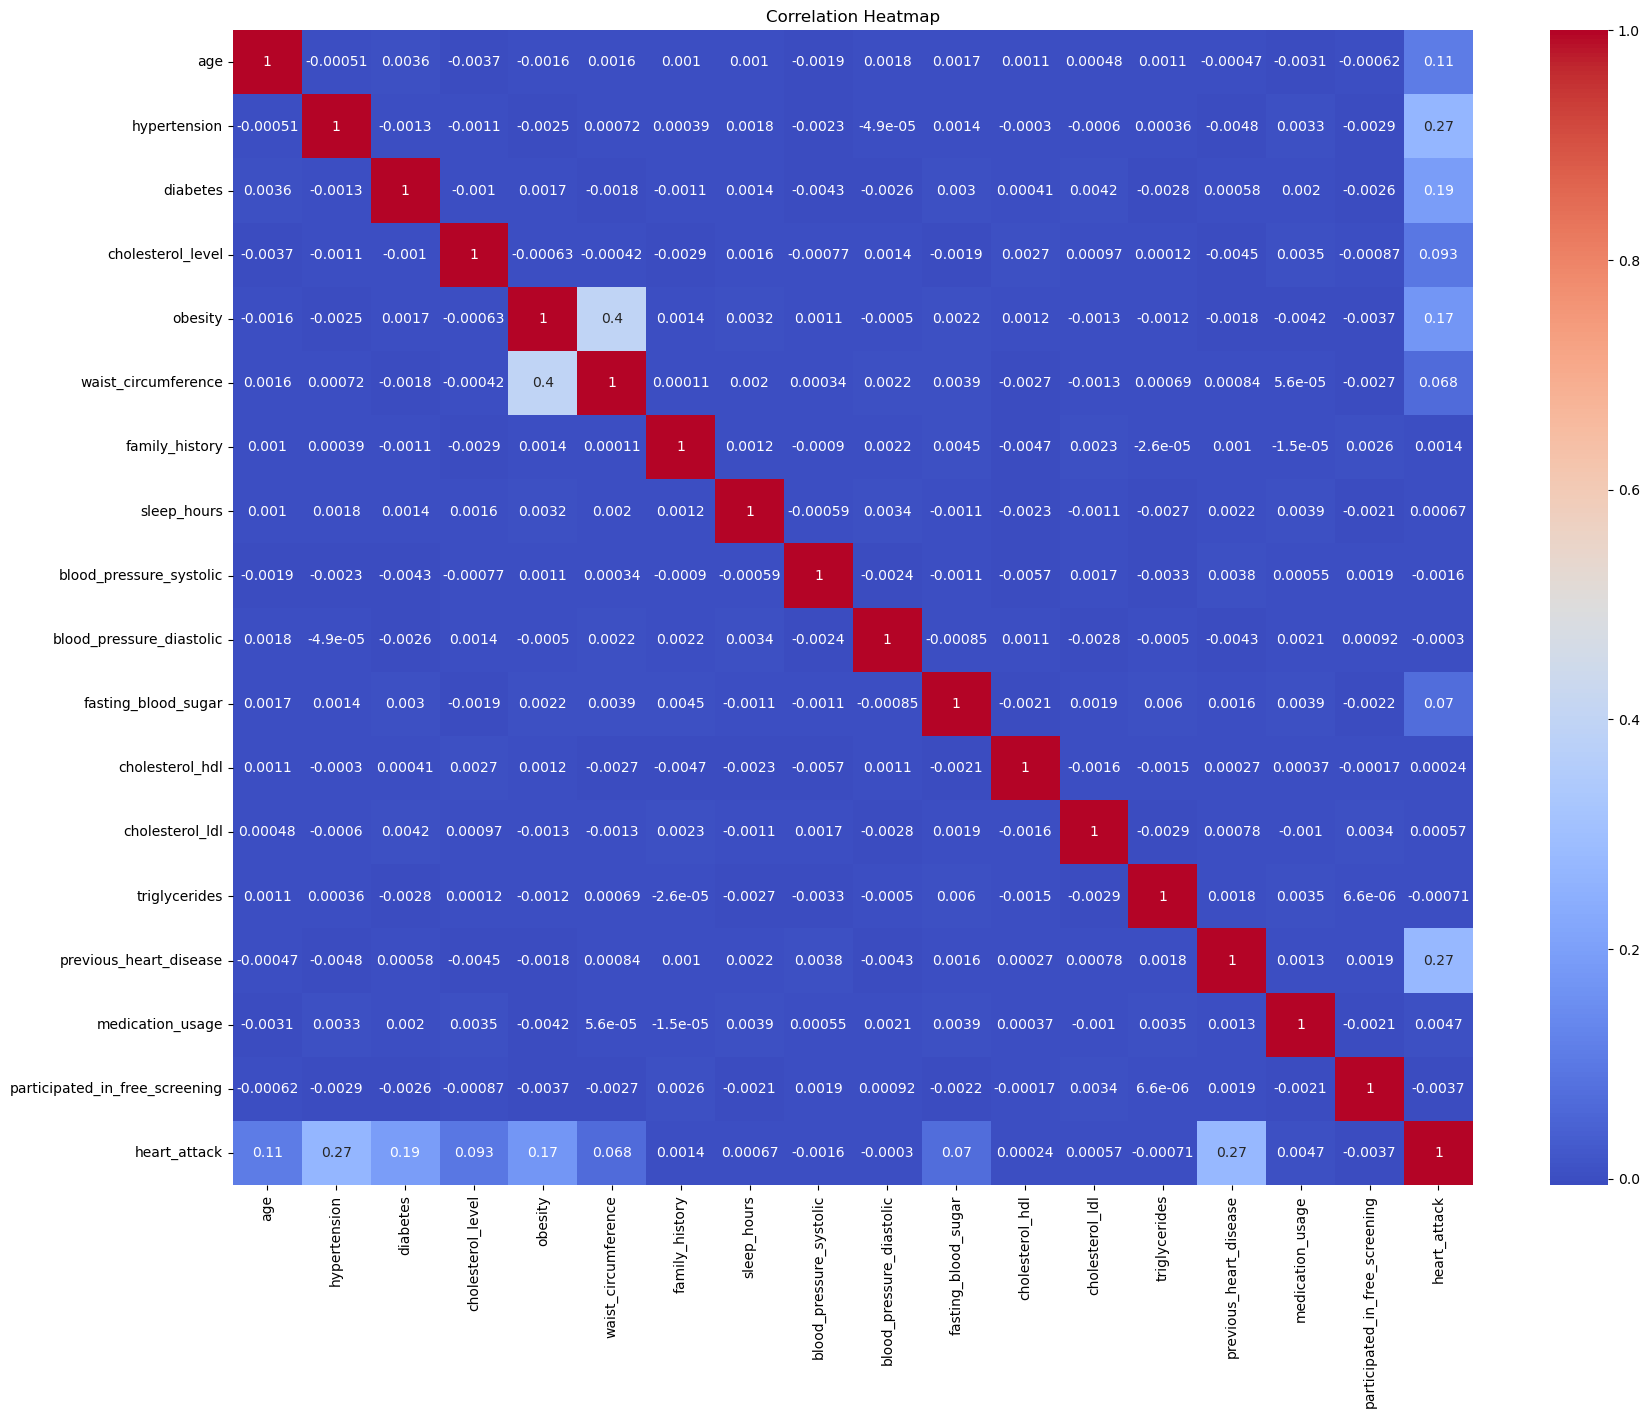

In [18]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Drop Features

In [19]:
df.drop(['sleep_hours','participated_in_free_screening','waist_circumference',
    'income_level', 'region', 'air_pollution_exposure', ], axis=1, inplace=True)

In [20]:
df.columns

Index(['age', 'gender', 'hypertension', 'diabetes', 'cholesterol_level',
       'obesity', 'family_history', 'smoking_status', 'alcohol_consumption',
       'physical_activity', 'dietary_habits', 'stress_level',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl',
       'triglycerides', 'EKG_results', 'previous_heart_disease',
       'medication_usage', 'heart_attack'],
      dtype='object')

In [21]:
categorical_cols = ['gender', 'smoking_status', 'alcohol_consumption',
       'physical_activity', 'dietary_habits', 'stress_level', 'EKG_results']

numerical_cols = ['age','cholesterol_level', 'blood_pressure_systolic', 'blood_pressure_diastolic',
       'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl','triglycerides',]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [23]:
# Lable Encoding for categorical Columns

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [24]:
# Standard Scaling on numerical features

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [25]:
df.head()

,age,gender,hypertension,diabetes,cholesterol_level,obesity,family_history,smoking_status,alcohol_consumption,physical_activity,...,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,heart_attack
0,0.458088,1,0,1,0.288563,0,0,1,2,0,...,-1.100641,-1.748568,2.249934,-0.155629,-0.249613,-0.993729,1,0,0,0
1,-0.129611,0,0,0,0.213067,0,1,2,2,2,...,0.165553,-0.348979,-1.472057,0.854339,-1.343508,-0.238986,1,1,0,0
2,0.626002,0,0,0,0.791866,1,1,2,1,2,...,-0.900716,-0.548920,0.262463,1.965304,0.009467,0.434163,0,0,1,1
3,1.549529,1,1,0,0.062076,0,1,1,1,2,...,0.432121,-1.448656,-0.460254,0.248359,-1.285934,-0.075798,1,0,1,0
4,-0.213568,1,1,0,0.817031,0,0,0,1,2,...,-0.167656,-0.448949,-0.243439,0.955336,-0.076893,-0.218588,1,1,0,1


In [26]:
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
model_log = LogisticRegression()

model_log.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
y_pred_log = model_log.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.7285213602349152

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78     18906
           1       0.69      0.59      0.64     12765

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.71     31671
weighted avg       0.73      0.73      0.72     31671



In [30]:
random_FC_model = RandomForestClassifier()
random_FC_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
y_pred_RFC = random_FC_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_RFC))
print("\nClassification Report:\n", classification_report(y_test, y_pred_RFC))

Accuracy: 0.7313315020049888

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78     18906
           1       0.69      0.60      0.64     12765

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.71     31671
weighted avg       0.73      0.73      0.73     31671



In [32]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
y_pred_DT = model_DT.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("\nClassification Report:\n", classification_report(y_test, y_pred_DT))

Accuracy: 0.6588993085156768

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.71      0.71     18906
           1       0.58      0.59      0.58     12765

    accuracy                           0.66     31671
   macro avg       0.65      0.65      0.65     31671
weighted avg       0.66      0.66      0.66     31671



In [34]:
model_KNC = KNeighborsClassifier()
model_KNC.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [35]:
y_pred_KNC = model_KNC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_KNC))
print("\nClassification Report:\n", classification_report(y_test, y_pred_KNC))

Accuracy: 0.6603833159672887

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.75     18906
           1       0.63      0.39      0.48     12765

    accuracy                           0.66     31671
   macro avg       0.65      0.62      0.61     31671
weighted avg       0.65      0.66      0.64     31671



In [36]:
classifier_r = GridSearchCV((model_log),{
    'C' : [0.01,0.1, 1,10],
    'penalty' : ['l1', 'l2'],
    'solver': ['liblinear']
}, cv=5, scoring='accuracy', n_jobs=-1)

classifier_r.fit(X_train, y_train)

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [37]:
best_model = classifier_r.best_estimator_

y_pred_log = best_model.predict(X_test)

print("Best Params:", classifier_r.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Best Params: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7287423826213255
              precision    recall  f1-score   support

           0       0.75      0.83      0.78     18906
           1       0.69      0.58      0.63     12765

    accuracy                           0.73     31671
   macro avg       0.72      0.71      0.71     31671
weighted avg       0.73      0.73      0.72     31671



In [38]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight=3
)
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
xgb_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

Accuracy: 0.672444823339964

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.52      0.66     18906
           1       0.56      0.89      0.69     12765

    accuracy                           0.67     31671
   macro avg       0.72      0.71      0.67     31671
weighted avg       0.75      0.67      0.67     31671



In [40]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    scale_pos_weight=3
)
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [41]:
xgb_pred = xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nClassification Report:\n", classification_report(y_test, xgb_pred))

Accuracy: 0.672444823339964

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.52      0.66     18906
           1       0.56      0.89      0.69     12765

    accuracy                           0.67     31671
   macro avg       0.72      0.71      0.67     31671
weighted avg       0.75      0.67      0.67     31671

